In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sahisti = pd.read_csv("csv_datoteke/Glavna_tabela.csv")
sahisti[["Rang", "Id","Uporabniško ime","Elo","Naslov","Ime","Priimek","Država"]]

,Rang,Id,Uporabniško ime,Elo,Naslov,Ime,Priimek,Država
0,1,6083387,ManuDavid2910,2966,FM,Manu,David,India
1,2,3889224,MagnusCarlsen,2941,GM,Magnus,Carlsen,Norway
2,3,26824392,GutovAndrey,2936,GM,Andrey,Gutov,United States
3,4,57549096,SeanWinshand,2884,GM,Sean,Winshand,Indonesia
4,5,42022994,Firouzja2003,2844,GM,Alireza,Firouzja,France
...,...,...,...,...,...,...,...,...
1495,1496,473124418,Nguyenanhbaothy13,2391,Nima naslova,NaN,NaN,Vietnam
1496,1497,439374983,YutakaKen,2391,Nima naslova,NaN,NaN,Japan
1497,1498,404450211,DeVlaggendeHollander,2391,Nima naslova,NaN,NaN,Netherlands
1498,1499,296519045,Grand_master667,2391,Nima naslova,Ayan,Rabil,United States


# Analiza po državah
Naredili bomo analizo na dva načina. Prvi bo, da gledamo direktno po državah, drugi pa, da države grupiramo po celinah in naredimo analizo po celinah. Za začetek bomo pogledali katerih je top 5 držav iz katerih so šahisti. Med njimi pričakujemo Indijo, Rusijo in ZDA.

<Axes: xlabel='Država'>

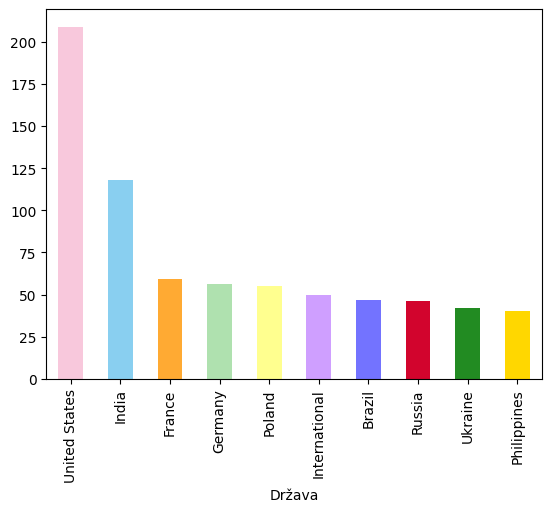

In [270]:
barve = ["#F8C8DC","#89CFF0","#FFAA33",
"#AFE1AF","#FFFF8F","#CF9FFF",
"#7373FF","#D2042D","#228B22",
"#FFD700"]
sahisti["Država"].value_counts().head(10).plot(kind = "bar",color = barve)

Vidimo, da je naša hipoteza potrjena.Tudi vidimo, da je naše razmišljanje bilo pravilno, saj so vse države na seznamu večje države, edina posebnost je morda le Polska. Sedaj podobno naredimo, le da namesto držav pogledamo Celine. Pričakujemo, da bo največ šahistov iz Azije, če ne drugega zato, ker je celina z največ prebivalci. Po drugi strani pričakujemo, da bo najmanj šahistov iz Afrike.

<Axes: title={'center': 'Deleži šahistov glede na celine'}>

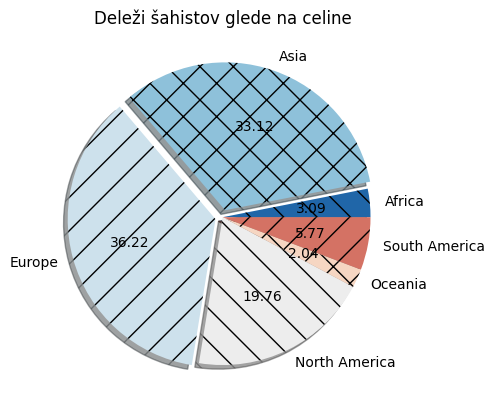

In [4]:
sahisti["štej"] = 1
barve = ["#2066a8","#8ec1da","#cde1ec","#ededed","#f6d6c2","#d47264"]
graf = sahisti[["Celina","štej"]][sahisti["Celina"]!="napaka"].groupby("Celina")["štej"].sum()
graf.plot(kind="pie", 
hatch=["\\","\\/","/"],
explode = [0,0.05,0.05,0,0,0],
shadow=True,autopct="%.2f",
title = "Deleži šahistov glede na celine",
label = "",
colors = barve)

Kot smo videli v obeh primerih morda golo število šahistov ni dober pokazatelj kako dobra je država (oziroma celina) v šahu, saj so potem majhne države zapostavljene. Torej bo bolje gledati število šahistov glede na prebivalca.

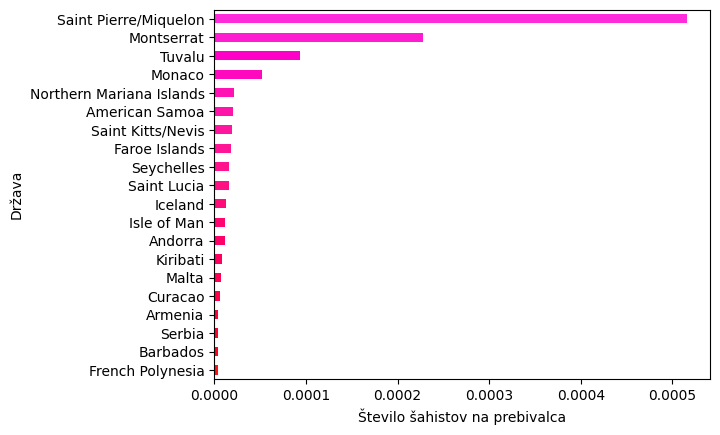

In [321]:
barve = ["#fe1414","#ff0022","#ff002e",
"#ff003b","#ff0048", "#ff0053",
"#ff005e","#ff0068", "#ff0571",
"#ff0c7b","#ff1184","#ff148d",
"#ff1596","#ff169f","#ff14a9",
"#ff11b3","#ff09be","#ff00c9",
"#ff1dd2","#ff2cdc"]
sahisti["Reciprikal prebivalstva države graf"] = sahisti["Reciprikal prebivalstva države"].apply(lambda x:
float("nan") if x == "Ni znano" else x)
sahisti["Reciprikal prebivalstva države graf"] = sahisti["Reciprikal prebivalstva države graf"].apply(lambda x: float(x))
graf = sahisti[["Država","Reciprikal prebivalstva države graf"]].groupby("Država").sum()["Reciprikal prebivalstva države graf"]
graf = graf.sort_values().tail(20).plot(kind = "barh",
xlabel="Število šahistov na prebivalca",
legend=False,
color = barve)

Lahko pa nekaj pdobnega izmerimo na drugačen način. Na primer, države in celine lahko primerjamo glede na povprečen elo vseh šahistov v top 1500. Začeli bomo s celinami. Pri celinah pričakujemo, da bo najvišje povprečje imela Evropa ali pa Azija.

<Axes: xlabel='Celina', ylabel='Povprečni elo'>

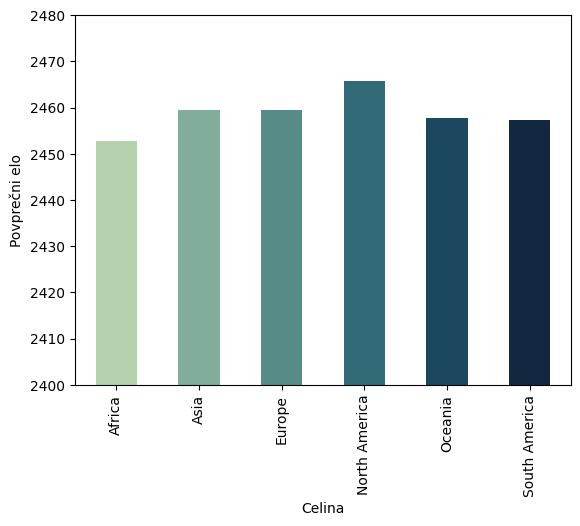

In [322]:
barve = ["#b5d1ae","#80ae9a","#568b87","#326b77","#1b485e","#122740"]
graf = sahisti[["Celina","Elo"]][sahisti["Celina"] != "Ni znano"].groupby("Celina")["Elo"].mean()
graf.plot(kind = "bar",
ylim=(2400, 2480), 
color=barve,
ylabel = "Povprečni elo")


Vidimo, da ima Azija res drugi največji Elo, ampak prva je pa Severna Amerika, ki pa je nismo pričakovali. Sedaj bomo podobno naredili za države. Ampak tukaj se pa nam zdi, da če ima država recimo le enega zelo dobrega šahista v top 1500, bo ta država nepravično priviligirana, torej gledamo gledamo le take države, ki imajo vsaj 5 šahistov v 1500. Tukaj je zelo težko sklepati za vnaprej, edino kaj lahko pričakujemo je, da bodo verjetno manjše države še vedno pozitivno priviligirane. Morda pričakujemo kakšne malo manjše države iz bivšega sovjetskega bloka, kjer je bil šah zelo popularen.

<function matplotlib.pyplot.show(close=None, block=None)>

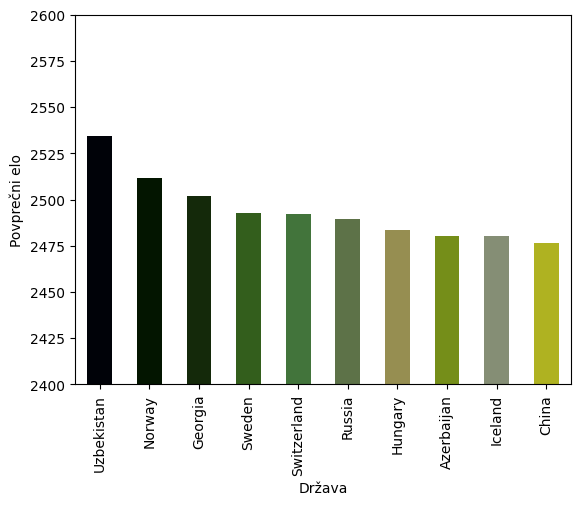

In [15]:
sahisti["ena"] = 1
barve = ["#000208","#031500","#14290a","#335e1c","#42743b","#5d7248","#968e51","#758e19","#858e75","#afb221"]
graf = sahisti[["Država","Elo","ena"]].groupby("Država").filter(lambda x: (x["ena"].sum() >= 5))
graf = graf[["Država","Elo"]].groupby("Država").mean().sort_values("Elo", ascending=False).head(10)["Elo"]
graf.plot(kind = "bar",
ylim=(2400, 2600),
color = barve,
ylabel="Povprečni elo")
plt.show

Vidimo, da smo imeli prav, da bo nekaj držav iz sovjetskega bloka, saj imamo Gruzijo, Uzbekistan in Rusijo, ki so iz Sovjetske zveze in pa tudi Madžarsko, ki je spadali pod sovjetski blok. Prav tako smo imeli prav, da bo kar nekaj manjših držav, saj če primerjamo s prejšnjim grafom vidimo da so države v povprečju tukaj veliko manjše kot prej, imamo med drugim Švico, Madžarsko, Švedsko in Norveško.

Definirali bomo še funkcijo, ki sprejme državo, ali celino in vrne tabelo igralcev iz tiste države. Kot primer bomo pogledali, kdo so najboljši šahisti na chess.com v Sloveniji, ampak prepuščamo bralcu, da sam pogleda za kakšno drugo državo ali celino.

In [12]:
def tabela_glede_na_državo(država):
    """
    Funkcija vrne tabelo najboljših šahistov za dano državo.
    """
    celine = {"Europe", "North America","South America", "Africa","Asia","Oceania"}
    if država in celine:
        return sahisti[["Rang","Uporabniško ime","Ime","Priimek","Elo","Država"]][sahisti["Celina"]==država] 
    else:
        return sahisti[["Rang","Uporabniško ime","Ime","Priimek","Elo"]][sahisti["Država"]==država] 


In [16]:
tabela_glede_na_državo("Slovenia")

,Rang,Uporabniško ime,Ime,Priimek,Elo
381,382,js20000,Jan,Subelj,2481
472,473,Max_The_Big_Guy,NaN,NaN,2467
788,789,labasch64,NaN,NaN,2431
909,910,stajerc,NaN,NaN,2423
1044,1045,NIKZVARC,NIK,ZVARC,2413


Naredimo še funkcijo, ki naredi škatlo z brki za Elo igralcev določene države (ali celine).

In [7]:
def škatla_z_brki(država):
    """
    Nariše tri škatle z brki, za elo v pospešenem šahu, streli in metku za dano državo.
    """
    celine = {"Europe", "North America","South America", "Africa","Asia","Oceania"}
    #Odstranimo podatke, ki jih nimamo in spremenimo imena.
    sahisti["Strela"] = sahisti["Strela elo"].apply(lambda x: float("nan") if x == "Ne igra strele" else x)
    sahisti["Strela"]= sahisti["Strela"].apply(lambda x: float(x))
    sahisti["Metek"] = sahisti["Metek elo"].apply(lambda x: float("nan") if x == "Ne igra metka" else x)
    sahisti["Metek"] = sahisti["Metek"].apply(lambda x: float(x))
    sahisti["Pospešeno"] = sahisti["Elo"]
    if država in celine:
        return sahisti[sahisti["Celina"] == država][["Pospešeno","Strela","Metek"]].boxplot(ylabel="Elo",labels=["Pospešeno","Strela","Metek"])
    else:
        return sahisti[sahisti["Država"] == država][["Pospešeno","Strela","Metek"]].boxplot(ylabel ="Elo")

<Axes: ylabel='Elo'>

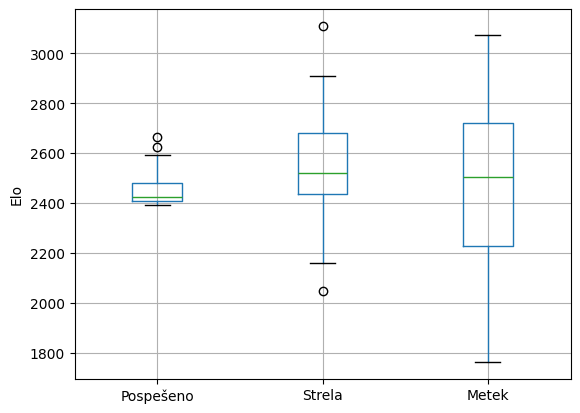

In [8]:
škatla_z_brki("Oceania")

# Analiza po času
Tudi po času bomo analizirali podatke na več načinov. Za začetek si poglejmo, kateri šahisti iz top 1500 so že najdlje na platformi.


In [9]:
sahisti[["Rang","Uporabniško ime","Elo","Datum"]].sort_values("Datum").head(25)

,Rang,Uporabniško ime,Elo,Datum
1109,1110,smotherhubbard,2410,2007-07-24
1041,1042,topengkhov,2414,2007-10-04
972,973,Valkiro,2418,2007-11-14
1392,1393,kxt100,2399,2007-11-19
245,246,mostafa_sakha,2506,2008-01-23
110,111,jonathanwesterberg,2576,2008-01-27
503,504,Snape,2463,2008-03-20
93,94,GMKrikor,2601,2008-04-11
58,59,Rakhmanov_Aleksandr,2638,2008-05-07
1368,1369,micwhite,2400,2008-05-25


Poglejmo si, kdaj so se igralci v top 1500 pridružili na chess.com in v katerem letu se jih je pridružilo največ. Pričakujemo, da se je največ igralcev pridružilo v letu 2020, saj je takrat med Covidom postalo popularno streamanje šaha na Twitchu in podobnih platformah. Graf bo prikazal podatke za vsako celino posebaj.

<Axes: xlabel='Datum', ylabel='Število igralcev'>

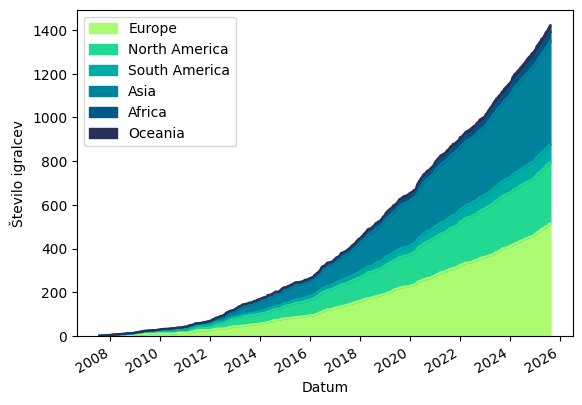

In [ ]:
import čas_funkcije
barve = ["#acfa70","#23d890","#00ada4",
"#00829d","#005886","#292f56"]
čas_funkcije.seštej_vse_do_nekega_datuma(sahisti).plot(kind="area",ylabel="Število igralcev",xlabel="Datum", color = barve)

Na tem grafu je lažje videti določene trende, kakor naprimer, da v povprečju rast narašča, saj je graf konveksen, ampak če želimo videti v katerem letu se je pridružilo največ šahistov, bomo to najlažje videli kar iz stolpičastega diagrama.

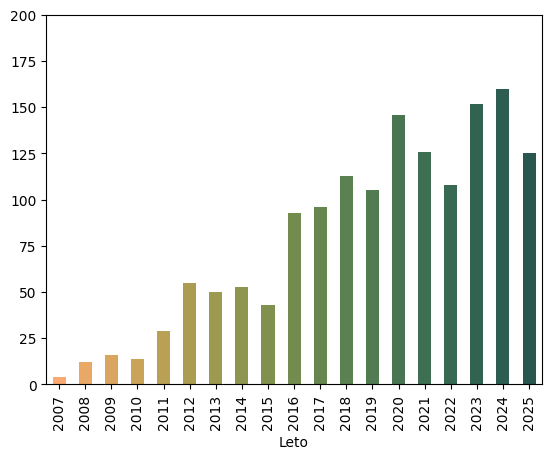

In [ ]:
# Dodamo stolpec "šteti", da lahko, ko seštejemo ta stolpec, dobimo podatke o številu šahistov za neko leto.
sahisti["šteti"] = 1 
barve = ["#faaa70","#eaa867","#daa65f",
"#caa359","#baa055","#ab9c52",
"#9c9950","#8e954f","#80904e",
"#748b4f","#67864f","#5c8150",
"#517b51","#487552","#3f6f52",
"#386952","#326351","#2d5c50",
"#29564e"]
a = sahisti[["Leto","šteti"]].groupby("Leto").sum()["šteti"].plot(kind="bar",ylim=(0, 200),color=barve)

Vidimo, da smo imeli delno prav, saj je 2020 po vrsti leto tretje najvišjega pridruževanja. Pogledali si bomo tudi, če obstaja kakšna korelacija med elotom in časom pridružitve. Ne pričakujemo znatne korelacije, ampak morda bo rahel negativni trend, saj se je večina najboljših šahistov, ki so se imeli namen pridružiti, pridružilo že par let nazaj.

Text(17590, 2750, 'r = -0.18')

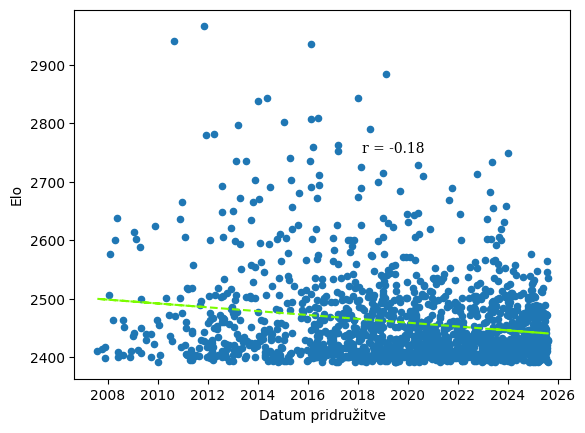

In [ ]:
from pomožne_python_datoteke.čas_funkcije import polinom_ki_gre_skozi_dane_datume
# Spremenimo tip datuma, saj je s takim tipom lažje delati numerične zadeve.
sahisti["Številski datum"] = sahisti["Datum"].apply(lambda x: np.datetime64(x))
sahisti["Številski datum"]
x = sahisti["Številski datum"].to_list()
y = sahisti["Elo"].to_list()
z = polinom_ki_gre_skozi_dane_datume(x,y)[0]
r = polinom_ki_gre_skozi_dane_datume(x,y)[1]
a = sahisti.plot(x="Številski datum",
y = "Elo",
kind="scatter",
xlabel = "Datum pridružitve")
a.plot(x, z,color = "#7CFC00", linestyle = "dashed", label = "fit")
a.text(17590,2750,f"r = {r.round(2)}", family = "serif")

Vidimo, da je res rahel negativni trend, ampak je koeficient korelacije zelo majhen, tako da težko povemo kaj tehtnega.

# Analiza po spolu
Šahiste bomo analizirali še po spolu. Naložili smo si Pythonovo knjižnico, ki na podlagi imena poizkusi ugotoviti spol osebe. V veliko primerih ne more podati enoznačnega odgovora (saj so nekatera imena manj znana, spet druga lahko tako za moške kot ženske), spet v drugih primerih pa poda napačen odgovor, tako da bodo podatki ki jih dobimo tukaj od vseh najmanj zaneslivi.

In [334]:
sahisti[["Rang","Ime","Priimek","Uporabniško ime","Spol"]]

,Rang,Ime,Priimek,Uporabniško ime,Spol
0,1,Manu,David,ManuDavid2910,Moški
1,2,Magnus,Carlsen,MagnusCarlsen,Moški
2,3,Andrey,Gutov,GutovAndrey,Moški
3,4,Sean,Winshand,SeanWinshand,Moški
4,5,Alireza,Firouzja,Firouzja2003,Ni znano
...,...,...,...,...,...
1495,1496,NaN,NaN,Nguyenanhbaothy13,Ni znano
1496,1497,NaN,NaN,YutakaKen,Ni znano
1497,1498,NaN,NaN,DeVlaggendeHollander,Ni znano
1498,1499,Ayan,Rabil,Grand_master667,Moški


Poglejmo koliko je moških, koliko žensk in za koliko oseb nismo znali določiti. Pričakujemo, da bo veliko več moških kakor žensk.

<Axes: xlabel='Spol', ylabel='Število šahistov'>

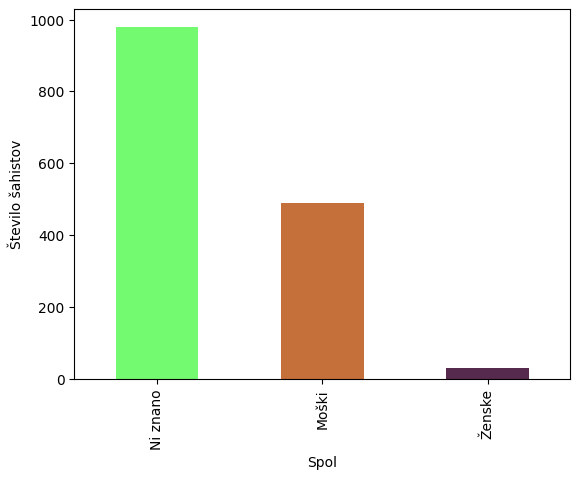

In [ ]:
barve = ["#73fa70","#c5703a","#56294f"]
# Dodamo nov stolpec da bo oznaka pravilna.
sahisti["Spol množina"] =  sahisti["Spol"].apply(lambda x: "Ženske" if x == "Ženska" else x)
sahisti["Spol množina"].value_counts().plot(kind="bar",
color=barve,
ylabel="Število šahistov",
xlabel="Spol")

Vidimo, da je bila naša hipoteza potrjena. Glede na to, da je toliko več moških, si oglejmo, kdo so najboljše ženske šahistke na chess.com.

In [338]:
sahisti[["Rang","Ime","Priimek","Uporabniško ime"]][sahisti["Spol"]=="Ženska"]

,Rang,Ime,Priimek,Uporabniško ime
6,7,Hikaru,Nakamura,Hikaru
12,13,Nihal,Sarin,nihalsarin
68,69,Gauri,Shankar,grandmastergauri
105,106,Raven,Sturt,BirdMaster3000
198,199,Kim,Kahre,KimKahre
248,249,Luna (Xiaowen),Cao,kazuko-chan
363,364,Zane,Nasir,stolencandy13
392,393,Sina,Rezaeipour,Sina_Barandesho
424,425,Minh,Tran Tuan,TranJMinh
437,438,The Greatest,GM Of All Time,Amoorriii


Vidimo že tukaj, da so podatki kar se da nezanesljivi, saj lahko že za nekaj oseb v tej tabeli vidimo, da so osebe moškega spola. Na primer znanega šahista Hikaru Nakamuro prepozna kot žensko, Poglejmo še kako se razlikuje povprečni Elo glede na spol. Od tu dalje bomo gledali zgolj moške in ženske.

<Axes: xlabel='Spol', ylabel='Elo'>

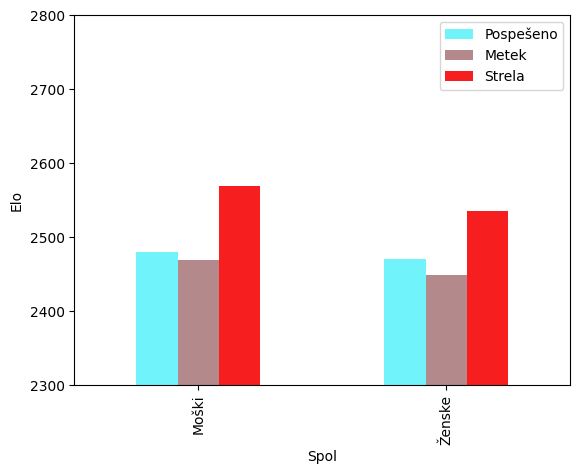

In [ ]:
# Dodamo nove stolpce, da bodo prave oznake in spremenimo vrednosti, pri katerih nimamo podatkov, da jih lahko pandas izpusti.
sahisti["Strela"] = sahisti["Strela elo"].apply(lambda x: float("nan") if x == "Ne igra strele" else x)
sahisti["Strela"]= sahisti["Strela"].apply(lambda x: float(x))
sahisti["Metek"] = sahisti["Metek elo"].apply(lambda x: float("nan") if x == "Ne igra metka" else x)
sahisti["Metek"] = sahisti["Metek"].apply(lambda x: float(x))
sahisti["Pospešeno"] = sahisti["Elo"]
sahisti["Spol množina"] =  sahisti["Spol"].apply(lambda x: "Ženske" if x == "Ženska" else x)
barve = ["#70f3fa","#b3898c","#f61e1e"]
graf = sahisti[["Spol množina","Pospešeno","Metek","Strela"]][(sahisti["Spol množina"]=="Moški") | (sahisti["Spol množina"] == "Ženske")].groupby("Spol množina").mean()
graf.plot(kind="bar", 
xlabel = "Spol",
ylabel="Elo",
ylim=(2300, 2800),
color=barve)

Vidimo, da imajo ženske v povprečju malo manjši elo kot moški. 

# Analiza po ogledih
Chess.com nam tudi nudi podatke o tem, koliko ogledov ima nek dani profil. Pogledali si bomo kateri igralci imajo največkrat ogledane profile. Med njimi pričakujemo znane šahovske influencerje, kot so Levy Rozman (Gothamchess), Hikaru Nakamura, Anna Cramling, Aleksandro in Andreo Botez in seveda Magnusa Carlsena.

In [343]:
sahisti[["Rang","Uporabniško ime","Opazovalci"]].sort_values("Opazovalci", ascending=False).head(25)

,Rang,Uporabniško ime,Opazovalci
6,7,Hikaru,10193439
1,2,MagnusCarlsen,5296102
569,570,GothamChess,2015690
75,76,DanielNaroditsky,1817566
4,5,Firouzja2003,921991
12,13,nihalsarin,662185
52,53,penguingm1,548113
2,3,GutovAndrey,543667
5,6,LyonBeast,536474
311,312,Yaacovn,512658


Vidimo, da smo imeli delno prav. Nekatera izmed teh imen so res v top 25 in tudi nekateri drugi šahisti v top 25 so influencrji, ki jih nismo prej omenili. Na primer Daniel Naroditsky. Razlog zakaj nekateri drugi izmed omenjenih niso v top 25 je, ker niso v top 1500 šahistov

Pogledali si bomo od kod prihajajo najbolj popularni šahisti. Torej iz katerih držav je top 100 najbolj popularnih šahistov. Pričakujemo, da bo večina iz Amerike, saj je večina popularnih šahistov, kot smo že povedali influencerjev na Youtube-u in Twitchu in nasplošno je znano, da sta ti dve platformi dominirani s strani američanov. Prav tako pričakujemo, da bo veliko Indijcev, saj je nasplošno, kot smo že videli veliko Indijcev v top 1500.

<Axes: xlabel='Država'>

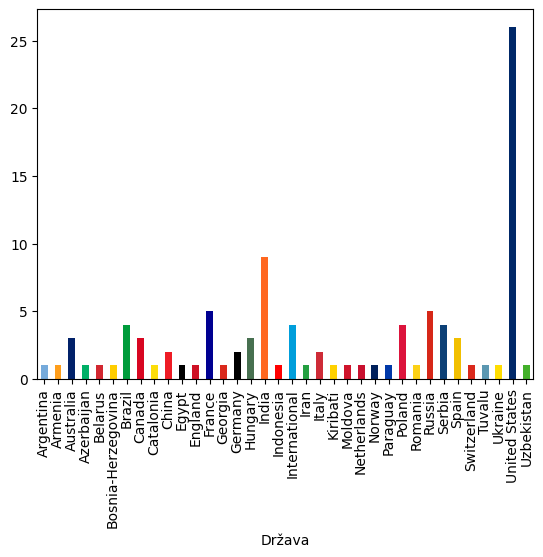

In [344]:
barve = ["#75AADB","#FF9E1B","#012169",
"#00AF66","#D22730","#FFCD00",
"#009C3B","#D80621","#FCDD09",
"#EE1C25", "#000000","#CE1124",
"#000091","#DA291C","#000000",
"#477050","#FF671F","#FF0000",
"#009EDB","#239F40","#ce2b37",
"#FFD100","#CF142B","#C8102E",
"#00205B","#0038A8","#DC143C",
"#FCD116","#D62718","#0C4076",
"#F1BF00","#DA291C","#5B97B1",
"#FFDD00","#002868","#43B02A"]
sahisti["ena"] = 1
graf = sahisti[["Država","Opazovalci","ena"]].sort_values("Opazovalci", ascending=False).head(100)[["Država","ena"]].groupby("Država").sum("ena")["ena"]
graf.plot(kind="bar", color = barve)

Podobno stvar bi lahko tudi zmerili malo drugače, recimo, da bi pogledali skupne oglede glede na državo, ali pa recimo glede na celino. 

<Axes: xlabel='Država'>

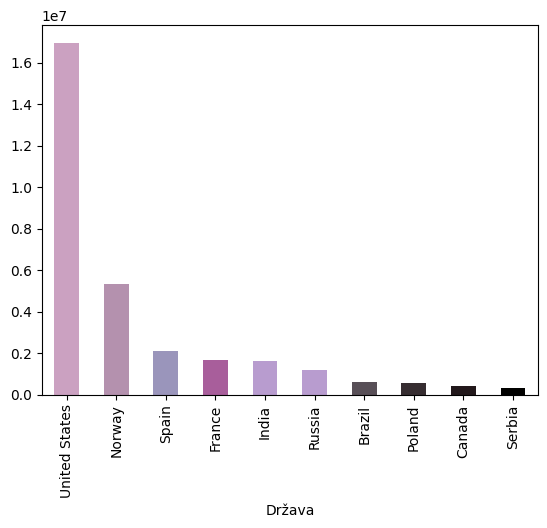

In [345]:
barve = ["#cba1c1","#b491ae","#9a95bb",
"#a85e9b","#b89ccf","#b89ccf",
"#584f57","#362d31","#22181b",
"#010100"]
graf = sahisti[["Država", "Opazovalci"]].groupby("Država").sum().sort_values("Opazovalci", ascending = False).head(10)["Opazovalci"]
graf.plot(kind = "bar",color = barve)

Vidimo, da sta oba grafa potrdila naši hipotezo, da imajo šahisti v Ameriki največ ogledov. Prav tako na obeh grafih najdemo Indijo, na prvem je kar druga, na drugem pa peta. Poglejmo si še enako za celine. Mislim, da ne rabimo niti omeniti, da pričakujemo na prvem mestu Severno Ameriko.

<Axes: xlabel='Celina'>

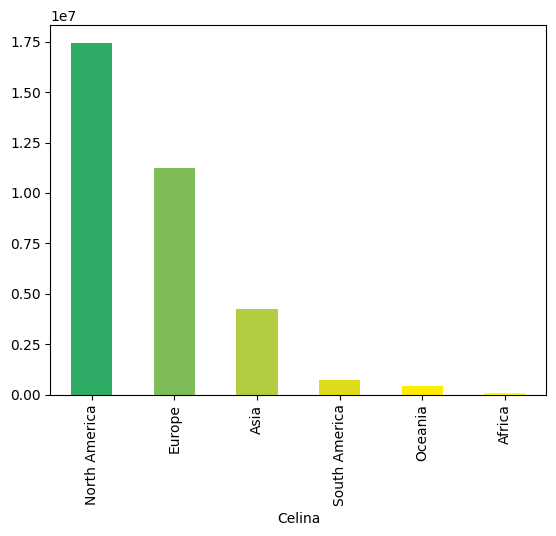

In [346]:
barve = ["#2eac66","#7ebc57","#b3cd41",
"#dfdd19","#ffed00","#FFFF00"]
graf = sahisti[["Celina", "Opazovalci"]][sahisti["Celina"] != "napaka"].groupby("Celina").sum().sort_values("Opazovalci",ascending=False)["Opazovalci"]
graf.plot(kind = "bar",color=barve)

Vidimo, da tudi ta graf potrdi našo hipotezo. Prav tako nas ne šokira, da je na drugem mestu Evropa, saj so skoraj vse države na prejšnjih dveh grafih, z izjemo ZDA in nekaterih drugih večjih držav iz Evrope. Napišemo podobno kot prej funkcijo, ki sprejme kot parameter državo (ali celino) in vrne tabelo igralcev iz tiste države, rangirano po številu prebivalcev.

In [347]:
def tabela_glede_na_državo_glede_na_opazovalce(država):
    celine = {"Europe", "North America","South America", "Africa","Asia","Oceania"}
    if država in celine:
        graf = sahisti[["Rang","Uporabniško ime","Ime","Priimek","Opazovalci","Elo","Država"]][sahisti["Celina"]==država]
        return graf.sort_values("Opazovalci",ascending=False)
    else:
        graf = sahisti[["Rang","Uporabniško ime","Ime","Priimek","Opazovalci","Elo"]][sahisti["Država"]==država]
        return graf.sort_values("Opazovalci",ascending=False)


In [348]:
tabela_glede_na_državo_glede_na_opazovalce("Slovenia")

,Rang,Uporabniško ime,Ime,Priimek,Opazovalci,Elo
381,382,js20000,Jan,Subelj,4069,2481
1044,1045,NIKZVARC,NIK,ZVARC,2414,2413
909,910,stajerc,NaN,NaN,2045,2423
472,473,Max_The_Big_Guy,NaN,NaN,812,2467
788,789,labasch64,NaN,NaN,307,2431


In [349]:
tabela_glede_na_državo_glede_na_opazovalce("China")

,Rang,Uporabniško ime,Ime,Priimek,Opazovalci,Elo
18,19,chesspanda123,Yu,Yangyi,103944,2740
15,16,LOVEVAE,Wei,Yi,58089,2759
112,113,joshuagarry,景天,吴,3230,2574
685,686,111kst874,NaN,NaN,2632,2441
125,126,lychess666,Yi,Lin,1941,2564
1161,1162,TreAsuReHunTeR21,NaN,NaN,1588,2407
195,196,2012Beast,NaN,NaN,1477,2523
1205,1206,Optimistic-player,NaN,NaN,1143,2405
1135,1136,IlikeHolidays,j,z,972,2408
1321,1322,atwqc,NaN,NaN,961,2401


Zanima nas tudi, če ljudje bolj opazujejo ljudi, ki so boljši ali je za slavo potrebno kaj drugega kakor biti dober v šahu. Poglejmo torej, če obstaja korelacija med elotom in opazovnostjo. Pogledali bomo zgolj Elo v pospešen šahu.

Text(2800, 1500000.0, 'r = 0.27')

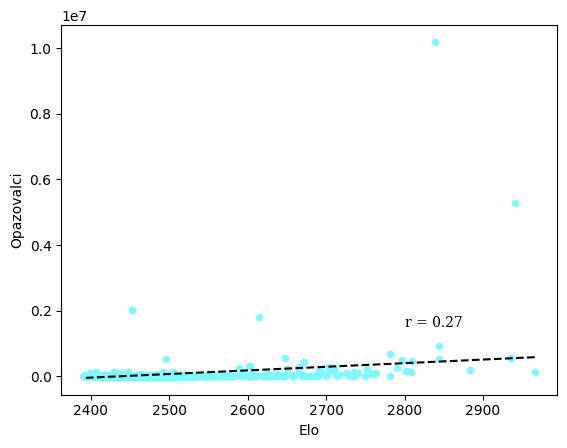

In [ ]:
# Knjižnic naložimo, saj jo potrebujemo za regresijski koeficient.
import scipy
graf = sahisti.plot(kind="scatter",x="Elo",y="Opazovalci",color="#7DF9FF")
# To je za regresijsko premico.
z = np.polyfit(x=sahisti["Elo"], y=sahisti["Opazovalci"], deg=1)
p = np.poly1d(z)
r = scipy.stats.pearsonr(sahisti["Elo"], sahisti["Opazovalci"]).statistic
graf.plot(sahisti["Elo"],p(sahisti["Elo"]),
color = "#000000",
linestyle = "dashed",
label = "fit")
# Za dodatno besedilo.
graf.text(2800,(1.5)*10**6,
f"r = {r.round(2)}",
family = "serif")


Vidimo, da je pozitivna korelacija, kakor bi pričakovali, ampak ni visoka, tako da ponovno ne moremo povedati ničesar z visoko korelacijo.

# Ostala analiza
Tukaj bomo še analizirali podatke glede na količine, ki jih ne moremo lepo postaviti v nobeno od prejšnjih kategorij.

Pogledali si še bomo, če je rek "vaja dela mojstra" resničen, torej, če obstaja kakšna korelacija med tem, koliko iger igra oseba in njenim Elotom. Pričakujemo, da neke znatne korelacije ne bo, kvečjemu bo negativna, saj ko pridejo igralci do najvišjega nivoja, bodo verjetno manj igrali, saj jih bo bolj strah izgubiti svoj Elo. Prav tako ima veliko izmed profesionalnih šahistov druge račune, na katerih vadijo in računi na katerih največ igrajo niso enaki njihovim uradnim računom.

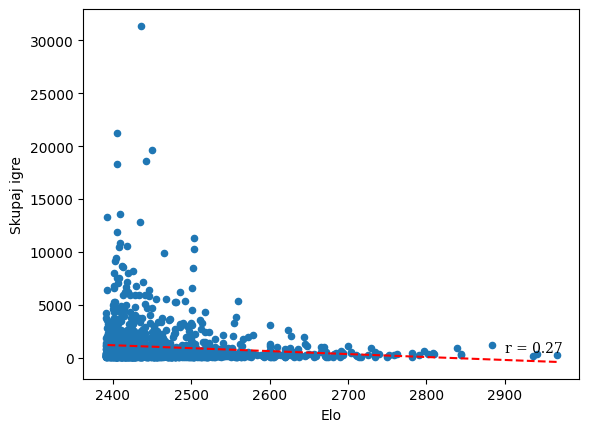

In [ ]:
# Knjižnic naložimo, saj jo potrebujemo za regresijski koeficient.
import scipy
graf = sahisti.sort_values("Elo").plot(x="Elo",
y="Skupaj igre",
kind="scatter")
#To je za dodatno besedilo.
graf.text(2900,500,f"r = {r.round(2)}", family = "serif")
#To je za regresijsko premico.
z = np.polyfit(x=sahisti["Elo"], y=sahisti["Skupaj igre"], deg=1)
p = np.poly1d(z)
r = scipy.stats.pearsonr(sahisti["Elo"], sahisti["Skupaj igre"]).statistic
graf.plot(sahisti["Elo"],p(sahisti["Elo"]),
color = "r",
linestyle = "dashed",
label = "fit")


Vidimo, da res ni nobene znatne korelacije.

Napisali bomo funkcijo, ki kot parameter sprejme rang šahista, ali pa njegovo uporabniško ime in vrne tortni diagram njegovih iger, to je prikaže koliko iger je zmagal, koliko remiziral in koliko izgubil.

In [ ]:
import matplotlib.pyplot as plt
def tortni_diagram_za_igralca(igralec):
    """
    Nariše tortni diagram za danega igralca, v katerem prikaže število zmag/remijev/porazov
    """
    if type(igralec) == int:
        zmage = sahisti.loc[igralec-1].iat[7]
        remiji = sahisti.loc[igralec-1].iat[8]
        porazi = sahisti.loc[igralec-1].iat[9]
        ime = sahisti.loc[igralec-1].iat[1]
        vrednosti = [zmage, remiji, porazi]
        imena = ["Zmage", "Remiji", "Porazi"]
        barve = ["#ddfff7","#93e1d8","#ffa69e"]
        plt.title(ime)
        graf = plt.pie(vrednosti,
        labels=imena,
        explode=[0.0,0.1,0.1],
        hatch=["\\","\\/","/"],
        autopct="%.2f",
        startangle=25,
        shadow = "True",
        colors = barve)
        return graf
    else:
        for vrstica in sahisti.iterrows():
            if (vrstica[1]["Uporabniško ime"]) == igralec:
                return tortni_diagram_za_igralca(vrstica[1]["Rang"])


([<matplotlib.patches.Wedge at 0x73f1ce214440>,
 [Text(-0.5766038747435066, 0.9367646297927642, 'Zmage'),
  Text(0.22713139440855534, -1.178308673342442, 'Remiji'),
  Text(1.1966266689130283, 0.08991448852164856, 'Porazi')],
 [Text(-0.314511204405549, 0.5109625253415077, '53.67'),
  Text(0.1324933134049906, -0.6873467261164243, '34.82'),
  Text(0.6980322235325999, 0.05245011830429498, '11.50')])

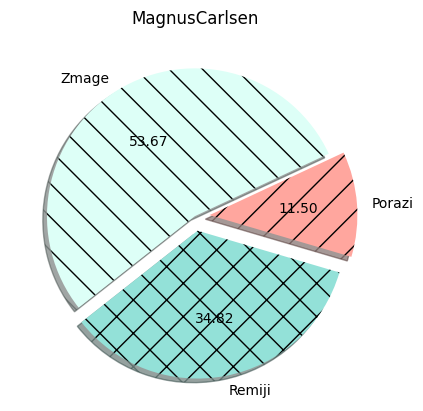

In [315]:
tortni_diagram_za_igralca("MagnusCarlsen")

([<matplotlib.patches.Wedge at 0x73f1cf026480>,
 [Text(-0.6673953666168996, 0.8744046115033328, 'Zmage'),
  Text(-0.4824498006359466, -1.0987457348569485, 'Remiji'),
  Text(0.9700956986637628, -0.7063386832349381, 'Porazi')],
 [Text(-0.3640338363364906, 0.47694796991090876, '56.86'),
  Text(-0.2814290503709688, -0.6409350119998865, '9.22'),
  Text(0.5658891575538616, -0.4120308985537139, '33.92')])

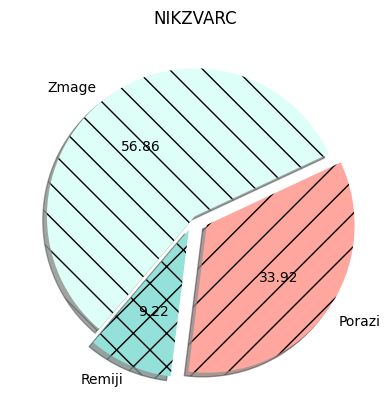

In [316]:
tortni_diagram_za_igralca("NIKZVARC")

V šahu dobijo boljši igralci naslove. Najbolj znan in najbolj prestižen je velemojster (pogovorno se za crème de la crème uporablja tudi izraz supervelemojster ampak to ni uradni naslov), tako da pričakujemo, da bo veliko izmed najboljših igrlacev na chess.com tudi velemojstrov. Ker pa se naslovi podeljujejo na podlagi drugega sistema, to je fide rejting, pričakujemo, da bo verjetno tudi znatni delež takih, ki pa niso velemojstri.

In [318]:
sahisti["Naslov"].value_counts()

Naslov
Nima naslova    1080
FM               101
GM               101
IM                85
NM                72
CM                56
WCM                3
WGM                1
WFM                1
Name: count, dtype: int64

Vidimo, da je res drugo največ velemojstrov. Je pa vbistvu kar dosti ljudi brez naslova.

Napišimo funkcijo, ki za dani naziv vrne šahiste s tistim nazivom.

In [ ]:
def tabela_šahistov_z_naslovom(naslov):
    """
    Vrne tabelo šahistov, ki imajo dani naslov
    """
    return sahisti[["Rang","Uporabniško ime", "Elo"]][sahisti["Naslov"] == naslov]

Kot smo že omenili kar dosti izmed šahistov nima nobenega naslova. Pa si poglejmo kdo so to.

In [320]:
tabela_šahistov_z_naslovom("Nima naslova")

,Rang,Uporabniško ime,Elo
17,18,lethalspider7,2750
39,40,thisonechessstreamer,2682
50,51,Darkis30,2656
54,55,stuffystuffy,2645
56,57,Chess_Rook2024,2644
...,...,...,...
1495,1496,Nguyenanhbaothy13,2391
1496,1497,YutakaKen,2391
1497,1498,DeVlaggendeHollander,2391
1498,1499,Grand_master667,2391


Za konec še povabimo bralca, da odpre datoteko analiza_elo.ipnyb, kjer je še en dodaten graf. Graf je v posebni datoteki, ker je aktivacija grafa v tej datoteki imelo za posledico nepravilno delovanje drugih grafov.